In [8]:
from echr import *
from classifier import *
from analysis import *
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
from datasets import DatasetDict
import json
from glob import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Original test data
all_datasets = {
    'test': {
        'chamber': pd.read_csv('datasets/test_chamber.csv'),
        'grand_chamber': pd.read_csv('datasets/test_grand_chamber.csv'),
    },
}

# The directory where the results are stored
results_dir = "results/"

# Load all results
all_results = load_all_results(results_dir)

# Store each method's average prediction per row in each test set
all_datasets = append_avg_predictions_to_datasets(all_datasets, results_dir)

# List of all the methods evaluated so far
methods = list(find_method_files(results_dir).keys())
print(f"💾 Working with the following methods {methods}")


📊 Processing test set: chamber
  🔍 Averaging predictions for method: mexpmin
  🔍 Averaging predictions for method: mexpmax
  🔍 Averaging predictions for method: obs
  🔍 Averaging predictions for method: obs_ip
  🔍 Averaging predictions for method: mexpagr
  🔍 Averaging predictions for method: mexpavg
  🔍 Averaging predictions for method: nn
  🔍 Averaging predictions for method: mexpall
  🔍 Averaging predictions for method: wcorr

📊 Processing test set: grand_chamber
  🔍 Averaging predictions for method: mexpmin
  🔍 Averaging predictions for method: mexpmax
  🔍 Averaging predictions for method: obs
  🔍 Averaging predictions for method: obs_ip
  🔍 Averaging predictions for method: mexpagr
  🔍 Averaging predictions for method: mexpavg
  🔍 Averaging predictions for method: nn
  🔍 Averaging predictions for method: mexpall
  🔍 Averaging predictions for method: wcorr
💾 Working with the following methods ['mexpmin', 'mexpmax', 'obs', 'obs_ip', 'mexpagr', 'mexpavg', 'nn', 'mexpall', 'wcorr']


## Analysis

/Users/corsteging/Documents/Projects/Label-Indeterminacy-in-AI-Law/analysis.py:247: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


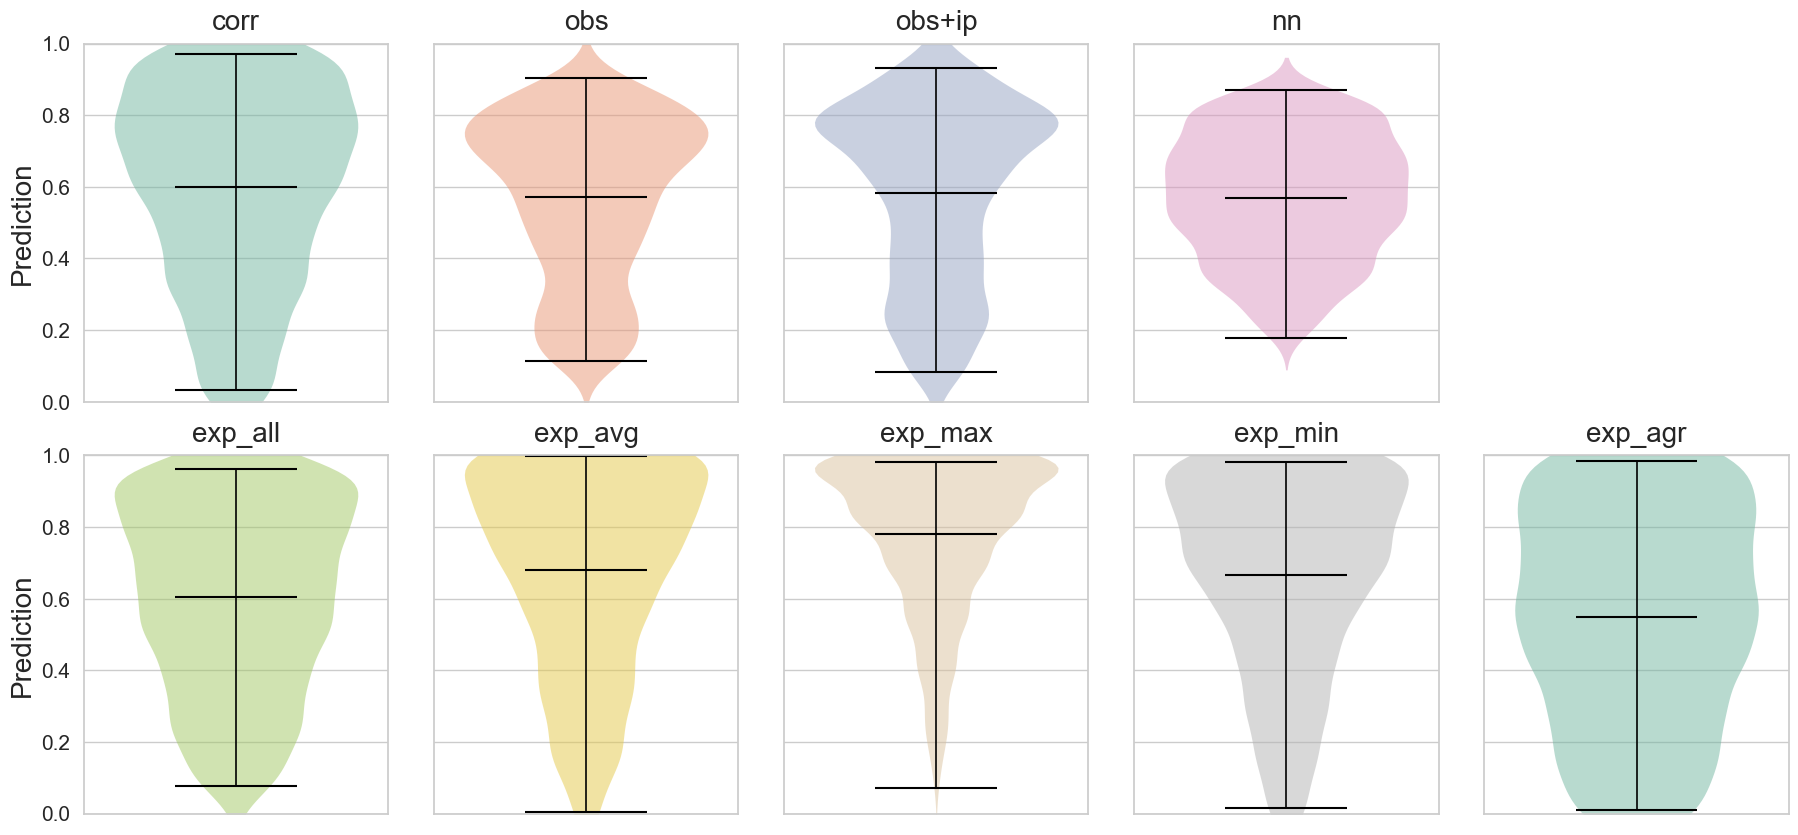

In [11]:
methods = ['wcorr', 'obs', 'obs_ip', 'nn', 'mexpall', 'mexpavg', 'mexpmax', 'mexpmin', 'mexpagr']
plot_prediction_distributions(all_datasets, methods, test_set_name='all', filename='analysis/violin_plots.png')

In [12]:
methods = ['baseline','wcorr', 'obs', 'obs_ip', 'nn', 'mexpall', 'mexpavg', 'mexpmax', 'mexpmin', 'mexpagr']
evaluate_metrics_per_method(all_results, methods=methods, filename='analysis/grand_chamber_performance.csv')

method,baseline,wcorr,obs,obs_ip,nn,mexpall,mexpavg,mexpmax,mexpmin,mexpagr
accuracy,52.94 ± 0.0,48.74 ± 3.46,57.98 ± 10.03,59.66 ± 7.66,52.94 ± 4.16,48.32 ± 5.85,50.84 ± 7.82,49.58 ± 8.08,52.1 ± 7.66,52.1 ± 4.9
f1,0.0 ± 0.0,30.44 ± 21.87,59.36 ± 14.91,61.49 ± 15.06,55.08 ± 6.21,36.16 ± 18.11,46.4 ± 15.37,53.94 ± 13.0,46.62 ± 13.05,39.06 ± 19.81
mcc,0.0 ± 0.0,-4.67 ± 6.1,18.74 ± 19.96,23.11 ± 17.36,5.49 ± 10.97,-5.86 ± 14.71,1.89 ± 17.31,1.42 ± 19.2,3.86 ± 16.55,1.29 ± 13.4


In [13]:
methods = ['baseline','wcorr', 'obs', 'obs_ip', 'nn', 'mexpall', 'mexpavg', 'mexpmax', 'mexpmin', 'mexpagr']
evaluate_metrics_per_method(all_results, methods=methods, body='chamber', filename='analysis/chamber_performance.csv')

method,baseline,wcorr,obs,obs_ip,nn,mexpall,mexpavg,mexpmax,mexpmin,mexpagr
accuracy,69.8 ± 0.0,59.57 ± 7.07,55.03 ± 6.23,56.09 ± 4.59,59.98 ± 7.16,61.01 ± 3.52,63.05 ± 4.49,66.02 ± 3.4,62.98 ± 4.39,59.01 ± 4.93
f1,82.22 ± 0.0,66.8 ± 12.04,64.7 ± 9.52,66.25 ± 7.54,69.12 ± 9.81,69.44 ± 5.56,72.71 ± 5.52,77.0 ± 4.11,72.66 ± 5.52,66.65 ± 7.35
mcc,0.0 ± 0.0,14.43 ± 2.61,0.14 ± 2.95,1.23 ± 6.78,9.1 ± 6.6,16.17 ± 4.35,14.47 ± 3.93,11.58 ± 5.52,14.37 ± 3.06,15.15 ± 3.71


## Individual analysis

In [14]:
top_diff_instances = find_max_diff_instances(all_datasets['test']['chamber'], methods[1:], top_n=10)

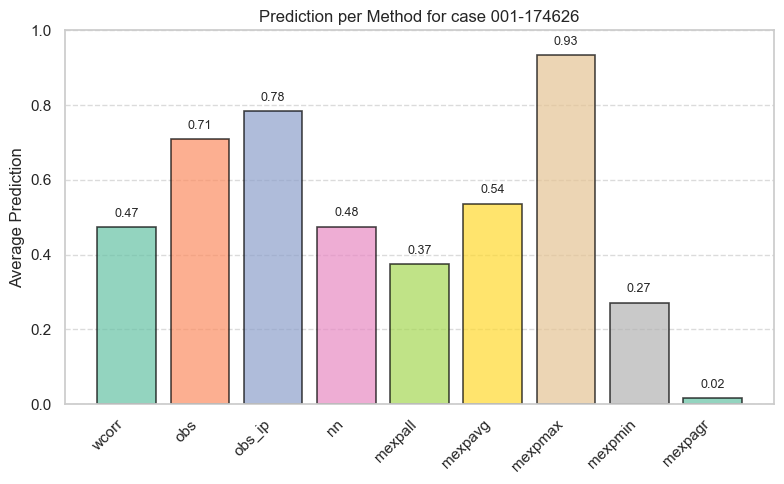

In [16]:
plot_method_predictions(top_diff_instances.iloc[0], methods[1:])

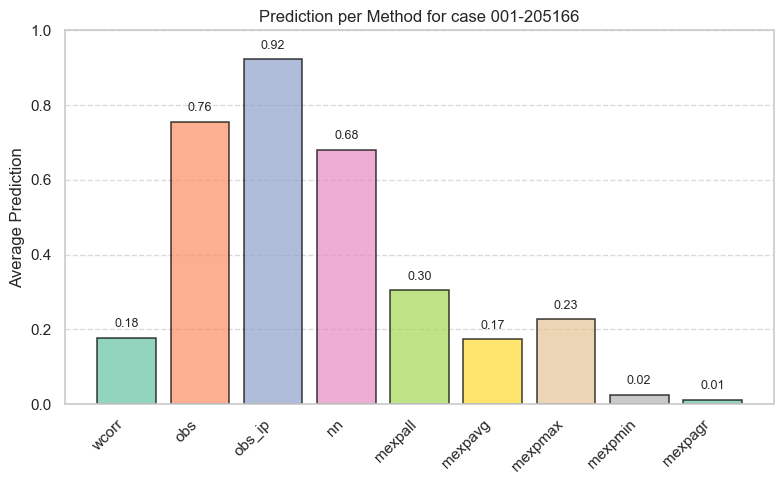

In [17]:
plot_method_predictions(top_diff_instances.iloc[2], methods[1:])

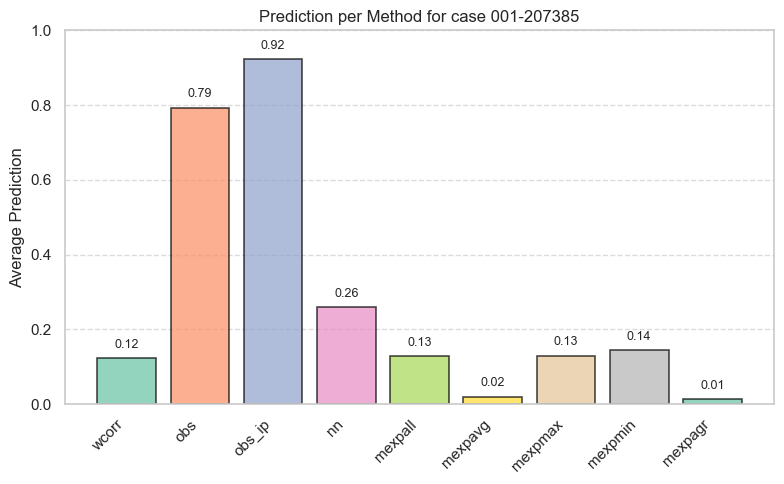

In [18]:
plot_method_predictions(top_diff_instances.iloc[3], methods[1:])